In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/oranges-vs-grapefruit/citrus.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
data = pd.read_csv('/kaggle/input/oranges-vs-grapefruit/citrus.csv')

X = data.drop(['name'], axis = 1)
y = data['name']
y = y.replace("orange", 0)
y = y.replace("grapefruit", 1)
# y[y == "orange"] = 0
# y[y == "grapefruit"] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)

y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
scaled_X_train

array([[0.38250556, 0.34712446, 0.58108108, 0.52631579, 0.        ],
       [0.49814678, 0.47273247, 0.5       , 0.26315789, 0.        ],
       [0.28391401, 0.23296137, 0.55405405, 0.69736842, 0.01851852],
       ...,
       [0.56115641, 0.54609442, 0.59459459, 0.39473684, 0.12962963],
       [0.51519644, 0.50437768, 0.72972973, 0.63157895, 0.        ],
       [0.67383247, 0.6839485 , 0.78378378, 0.36842105, 0.07407407]])

In [3]:
model =  keras.Sequential()
model.add(layers.Dense(14, activation='relu', input_shape=(5,)))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',   optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                84        
_________________________________________________________________
dense_1 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 30        
Total params: 324
Trainable params: 324
Non-trainable params: 0
_________________________________________________________________



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [4]:
history = model.fit(scaled_X_train,
                    y_train,
                    epochs=10,
                    batch_size=10,                                   
                    validation_split=0.2,
                    verbose = 2)

2021-12-19 15:01:18.325951: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
480/480 - 2s - loss: 0.4498 - accuracy: 0.7894 - val_loss: 0.2284 - val_accuracy: 0.9350
Epoch 2/10
480/480 - 1s - loss: 0.2147 - accuracy: 0.9202 - val_loss: 0.1704 - val_accuracy: 0.9367
Epoch 3/10
480/480 - 1s - loss: 0.1953 - accuracy: 0.9181 - val_loss: 0.1703 - val_accuracy: 0.9300
Epoch 4/10
480/480 - 1s - loss: 0.1902 - accuracy: 0.9219 - val_loss: 0.1597 - val_accuracy: 0.9408
Epoch 5/10
480/480 - 1s - loss: 0.1885 - accuracy: 0.9258 - val_loss: 0.1606 - val_accuracy: 0.9350
Epoch 6/10
480/480 - 1s - loss: 0.1881 - accuracy: 0.9223 - val_loss: 0.1584 - val_accuracy: 0.9392
Epoch 7/10
480/480 - 1s - loss: 0.1900 - accuracy: 0.9223 - val_loss: 0.1570 - val_accuracy: 0.9383
Epoch 8/10
480/480 - 1s - loss: 0.1884 - accuracy: 0.9233 - val_loss: 0.1586 - val_accuracy: 0.9358
Epoch 9/10
480/480 - 1s - loss: 0.1879 - accuracy: 0.9235 - val_loss: 0.1561 - val_accuracy: 0.9383
Epoch 10/10
480/480 - 1s - loss: 0.1858 - accuracy: 0.9254 - val_loss: 0.1599 - val_accuracy: 0.9367

In [5]:
def show_some(arr):
    loss_values = arr["loss"]
    val_loss_values = arr["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.show()

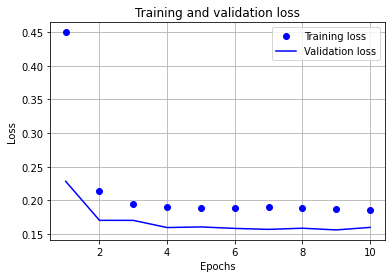

In [6]:
history_dict = history.history
show_some(history_dict)

In [7]:
score = model.evaluate(scaled_X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.18273739516735077
Test accuracy: 0.9267500042915344


In [8]:
model =  keras.Sequential()
model.add(layers.Dense(14, activation='relu', input_shape=(5,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',   optimizer='adam', metrics=['accuracy'])

history = model.fit(scaled_X_train,
                    y_train,
                    epochs=10,
                    batch_size=64,                                   
                    validation_split=0.2,
                    verbose = 2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 14)                84        
_________________________________________________________________
dropout (Dropout)            (None, 14)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 14)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 30        
Total params: 324
Trainable params: 324
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
75/75 - 1s - loss: 0.6872 - accuracy: 0.5531 - val_loss: 0.6567 - val_accuracy: 0.6033
Epoch 2/10
75/75 - 0s - 

In [9]:
model =  keras.Sequential()

model.add(layers.Dense(14, input_shape=(5,)))
model.add(layers.BatchNormalization()) 
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))

model.add(layers.Dense(14))
model.add(layers.BatchNormalization()) 
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))

model.add(layers.Dense(2, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',   optimizer='adam', metrics=['accuracy'])

history = model.fit(scaled_X_train,
                    y_train,
                    epochs=10,
                    batch_size=64,                                   
                    validation_split=0.2,
                    verbose = 2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 14)                84        
_________________________________________________________________
batch_normalization (BatchNo (None, 14)                56        
_________________________________________________________________
activation (Activation)      (None, 14)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 14)                210       
_________________________________________________________________
batch_normalization_1 (Batch (None, 14)                56        
_________________________________________________________________
activation_1 (Activation)    (None, 14)               

4431872/4422102 [==============================] - 0s 0us/step


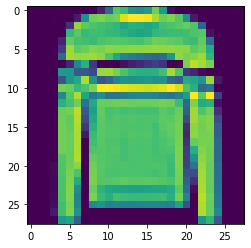

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() #train - 60_000 of 28x28 imgs, test - 10_000 of 28x28 imgs

# X_train = X_train_full[y_train_full == 0 or y_train_full == 1]
X_train = X_train_full[:5000] / 255.0
y_train = y_train_full[:5000]
X_test = X_test[:5000] / 255.0
y_test = y_test[:5000]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
plt.imshow(X_train[5])

In [11]:
model = keras.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 128)        

In [12]:
monitor = keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, monitor='val_accuracy', restore_best_weights=True)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=1, callbacks=[monitor])

Epoch 1/15
125/125 [==============================] - 5s 33ms/step - loss: 0.7525 - accuracy: 0.7377 - val_loss: 2.7824 - val_accuracy: 0.0950
Epoch 2/15
125/125 [==============================] - 4s 33ms/step - loss: 0.4498 - accuracy: 0.8370 - val_loss: 2.7314 - val_accuracy: 0.1160
Epoch 3/15
125/125 [==============================] - 4s 31ms/step - loss: 0.3707 - accuracy: 0.8650 - val_loss: 1.5138 - val_accuracy: 0.5230
Epoch 4/15
125/125 [==============================] - 4s 32ms/step - loss: 0.2779 - accuracy: 0.9007 - val_loss: 0.7628 - val_accuracy: 0.7450
Epoch 5/15
125/125 [==============================] - 5s 37ms/step - loss: 0.2317 - accuracy: 0.9145 - val_loss: 0.4131 - val_accuracy: 0.8660
Epoch 6/15
125/125 [==============================] - 4s 31ms/step - loss: 0.2095 - accuracy: 0.9233 - val_loss: 0.3398 - val_accuracy: 0.8770
Epoch 7/15
125/125 [==============================] - 4s 31ms/step - loss: 0.1565 - accuracy: 0.9465 - val_loss: 0.3171 - val_accuracy: 0.8860

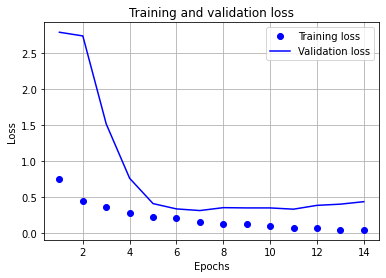

In [13]:
show_some(history.history)

In [14]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.4810992181301117
Test accuracy: 0.86080002784729


In [15]:
train_covid_data = pd.read_csv('../input/covid-19-nlp-text-classification/Corona_NLP_train.csv', encoding='latin-1')
test_covid_data = pd.read_csv('../input/covid-19-nlp-text-classification/Corona_NLP_test.csv', encoding='latin-1')

# train_covid_data[train_covid_data.Sentiment == 'Extremely Positive'].Sentiment = 1
# train_covid_data[train_covid_data.Sentiment == 'Extremely Negative'].Sentiment = 0
# test_covid_data[test_covid_data.Sentiment == 'Extremely Positive'].Sentiment = 1
# test_covid_data[test_covid_data.Sentiment == 'Extremely Negative'].Sentiment = 0

train_covid_data = train_covid_data.drop(columns=['UserName', 'ScreenName', 'Location', 'TweetAt'], axis = 1)
test_covid_data = test_covid_data.drop(columns=['UserName', 'ScreenName', 'Location', 'TweetAt'], axis = 1)



positive_data_train = train_covid_data[train_covid_data.Sentiment == 'Extremely Positive']
negative_data_train = train_covid_data[train_covid_data.Sentiment == 'Extremely Negative']
extreme_data_train = pd.concat([positive_data_train, negative_data_train])
extreme_data_train["Sentiment"] = extreme_data_train.Sentiment.apply(lambda i : 1 if i=='Extremely Positive' else 0)
positive_data_test = test_covid_data[test_covid_data.Sentiment == 'Extremely Positive']
negative_data_test = test_covid_data[test_covid_data.Sentiment == 'Extremely Negative']
extreme_data_test = pd.concat([positive_data_test, negative_data_test])
extreme_data_test["Sentiment"] = extreme_data_test.Sentiment.apply(lambda i : 1 if i=='Extremely Positive' else 0)
import re
import string
from nltk.corpus import stopwords
def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    stop_words = stopwords.words("english")
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text
X_train = extreme_data_train['OriginalTweet'].apply(lambda x: clean_text(x))
X_test = extreme_data_test['OriginalTweet'].apply(lambda x: clean_text(x))

y_train = extreme_data_train['Sentiment']
y_test = extreme_data_test['Sentiment']
phrase_len = X_train.apply(lambda p: len(p.split(' ')))
max_phrase_len = phrase_len.max()
print('max phrase len: {0}'.format(max_phrase_len))
y_train

max phrase len: 41


11       1
12       1
18       1
22       1
23       1
        ..
41115    0
41128    0
41130    0
41133    0
41153    0
Name: Sentiment, Length: 12105, dtype: int64

In [16]:
max_words = 10000
tokenizer = keras.preprocessing.text.Tokenizer(num_words= max_words, filters=' !"#$%&()*+,./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_phrase_len)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
X_train

array([[   0,    0,    0, ...,   37, 2720,   24],
       [   0,    0,    0, ...,  712,  819, 2560],
       [   0,    0,    0, ..., 1219,  169, 1507],
       ...,
       [   0,    0,    0, ...,    4, 1503, 1676],
       [   0,    0,    0, ...,  640,  262,  403],
       [   0,    0,    0, ...,   10,   81,   27]], dtype=int32)

In [17]:
emb_dim = 128

# model = keras.Sequential()
# model.add(layers.Embedding(max_words, output_dim = 256, input_length = max_phrase_len))
# model.add(layers.LSTM(256))
# # model.add(layers.LSTM(256, activation = 'relu'))
# model.add(layers.Dense(4, activation='sigmoid'))
# model.compile(optimizer="adam",
#               loss="binary_crossentropy",
#               metrics=["accuracy"])
model = keras.Sequential()
model.add(layers.Embedding(input_dim = max_words, output_dim = emb_dim, input_length = max_phrase_len))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.LSTM(emb_dim, dropout = 0.2, recurrent_dropout = 0.2))
model.add(layers.Dense(emb_dim, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(2, activation = 'softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)


In [18]:
history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2,
                    shuffle = True)
print(model.summary())

Epoch 1/5
76/76 [==============================] - 26s 297ms/step - loss: 0.4253 - accuracy: 0.7950 - val_loss: 0.4385 - val_accuracy: 0.7988
Epoch 2/5
76/76 [==============================] - 21s 281ms/step - loss: 0.0878 - accuracy: 0.9709 - val_loss: 0.3646 - val_accuracy: 0.8715
Epoch 3/5
76/76 [==============================] - 22s 287ms/step - loss: 0.0273 - accuracy: 0.9923 - val_loss: 0.3175 - val_accuracy: 0.9083
Epoch 4/5
76/76 [==============================] - 22s 289ms/step - loss: 0.0107 - accuracy: 0.9976 - val_loss: 0.5104 - val_accuracy: 0.8579
Epoch 5/5
76/76 [==============================] - 22s 290ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.4524 - val_accuracy: 0.8955
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 41, 128)           1280000   
_________________________________________________________________
spat

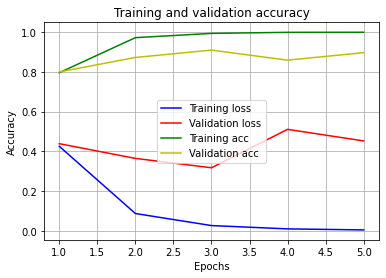

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.grid()
plt.legend()
# plt.show()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [20]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_phrase_len)
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.2801991403102875
Test accuracy: 0.9319899082183838
